# Diagnosticos y seleccion de modelos
**No se puede probar un algoritmo de ML con los mismos datos que se entrena!!!**

La unica forma de evitar esto es separando, por lo menos, dos grupos de datos. Uno para entrenar y otro para probar.
En la practica se usan tres grupos de datos.

1. **Entrenamiento**  es del orden de 40%. Solo para entrenar.
2. **Validacion**  es del orden de 20%. Se usa para probar distintos hiperparametros. Por ejemplo: orden de polinomio, numero de capas en una red neuronal, o de nodos por capa, etc.
3. **prueba**  (test) es del orden de 20%. Solo para probar.

Es comun tambien usar el $k$-fold cross-validation. Ya lo explique en el pasado. Se rotan. Uno para validar versus $k-1$ para entrenar.

Para entender el uso de estos grupos de datos vamos a formular un ejemplo simple.

**Ejemplo**: Asuma que vamos a hacer regresion lineal, y podemos formular las siguientes hipotesis, polinomiales.
Estamos en el dominio y rango $\mathbb{R}$.


\begin{eqnarray}
h_1(\theta, x) &=& \theta_0 + \theta_1 x \\
h_2(\theta, x) &=& \theta_0 + \theta_1 x + \theta_2 x^2  \\
&\vdots & \\
h_6(\theta, x) &=& \theta_0 + \theta_1 x + \theta_2 x^2  + \cdots + \theta_6 x^6.
\end{eqnarray}

Para cada una de estas hipotesis y conjuntos separados, se pueden definir funciones de costo.


\begin{eqnarray}
J_{\text{train}} &=&  \frac{1}{2 m_{\text{train}}}
\left [  \sum_{i=1}^{m_{\text{train}}} (h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{train}}} \theta_i^2
\right ]  \\
J_{\text{cv}} &=&  \frac{1}{2 m_{\text{cv}}}
\left [  \sum_{i=1}^{m_{\text{cv}}} (h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{cv}}} \theta_i^2
\right ]  \\
J_{\text{test}} &=&  \frac{1}{2 m_{\text{test}}}
\left [  \sum_{i=1}^{m_{\text{test}}} (h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{test}}}
\theta_i^2
\right ]
\end{eqnarray}


La idea es entrenar con todos los poliomios (de grados 1 al 6).
Luego en la cross-validation, escoger los $\theta$s que produzcan el menor error. Luego con estos $\theta$s se prueba la tercera funcion objetivo.

El modulo ```skelarn`` de ```Python``` tiene ya funciones para separar los datos. Veamos un ejemplo



In [5]:
from sklearn.model_selection import train_test_split  # esta la funcion que separa los datos
from sklearn.datasets import fetch_openml

# carga las datos del mnist y los separa en etrenamiento y prueba
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# separamos en dos grupos cara cada conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
print(f"el porcentaje es {100*len(X_test)/len(X)}, por ciento")

el porcentaje es 30.0, por ciento


## Bias vs Variance: Sesgo versus Varianza

Definiciones basicas:

* **Bias**: Es el error (en promedio) que los datos frente al modelo. Es la diferencia entre la prediccion en promedio y las etiquetas (que se conocent). Un **bias** alto implica una aproximacion muy burda (mala) del modelo.

* **Variance**:  Es el error dado de acuerdo a la varianza del modelo. A veces poner mucho enfasis en el modelo puede generar que se ajuste muy bien al ruido y aunque en el entrenamiento arroje un error pequenho, en las pruebas no es asi. Esto general
el fenomeno de **overfitting** (sobreajuste).

* **Noise** (ruido): En datos reales el ruido es una componente existente.

Vamos a hacer un analisis mas cuantitativo del bias-vs-variance.

$$J =  \frac{1}{2 m}
\left [  \sum_{i=1}^{m} (h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta} \theta_i^2
\right ]  $$

El primer termino de esta funcion es basicamente el
[MSE](https://en.wikipedia.org/wiki/Mean_squared_error)
salvo el $2$ en el denominador que es solo por conveniencia.
El segundo termino es la regularizacion. La ignoramos para este analisis (por el momento).

En general tenemos el modelo

$$ y = f(x) + \epsilon.$$
donde $f$ es el modelo, $\epsilon$ es error y $y$ las etiquetas.

La idea es del MSE obtener como este se reparte entre **bias** y **variance**. Comencemos con la forma formal del MSE.


$$ \mathbb{E}[ (y - h(x)]^2 = \sum_{i=1}^m (y_i - h(x_i))^2 p(x_i).$$

Definamos matematicamente el sesgo y la varianza.
Asuamos $\epsilon=0$.

\begin{eqnarray}
\text{Bias}[ h(x)] &=& \mathbb{E}[h(x)] - \mathbb{E}[f(x)] \\
\text{Var}[h(x)] &=&  \mathbb{E}[h^2(x)] - \mathbb{E}^2[h(x)]
\end{eqnarray}

Ya tenemos todas las herramientas para compara la contribucion de bias y la varianza en el MSE.

\begin{eqnarray}
\mathbb{E}[ (y - h(x)^2)] &=& \mathbb{E}[y^2 - 2 y h(x) + h^2(x)] = y^2 - 2 y \mathbb{E}[h(x)] + \mathbb{E}[h^2(x)]  \\
\text{Bias}^2[h(x)] &=& ( \mathbb{E}[h(x)] - \mathbb{E}[f(x)])^2 \\
&=& \mathbb{E}^2[h(x)] - 2 \mathbb{E}[h(x)] \mathbb{E}[(f(x)] + \mathbb{E}^2[ f(x) ] \\
&=& \mathbb{E}^2[h(x)] - 2y \mathbb{E}[h(x)] + y^2 \\
\text{Var}[h(x)] &=&  \mathbb{E}[h^2(x)] - \mathbb{E}^2[h(x)]
\end{eqnarray}
De nuevo, asumiento $\epsilon=0$.  Escribamos la primera de estas tres ecuaciones como


\begin{eqnarray}
\mathbb{E}[ (y - h(x)^2)] &=&  y^2 - 2 y \mathbb{E}[h(x)] + \mathbb{E}^2[h(x)] + \mathbb{E}[h^2(x)]  -\mathbb{E}^2[h(x)] \\
&=& \text{Bias}^2[h(x)] + \text{Var}[h(x)].
\end{eqnarray}

En conclusion el MSE es la suma del $\text{Bias}[h(x)]^2$ mas
la $\text{Var}[h(x)].$

Es decir

$$MSE= \mathbb{E}[(y - h(x))^2]   
= \text{Bias}^2[h(x)] + \text{Var}[h(x)].  $$

Veamos una grafica donde se ilustra el concepto de bias-vs-variance de una forma clara.



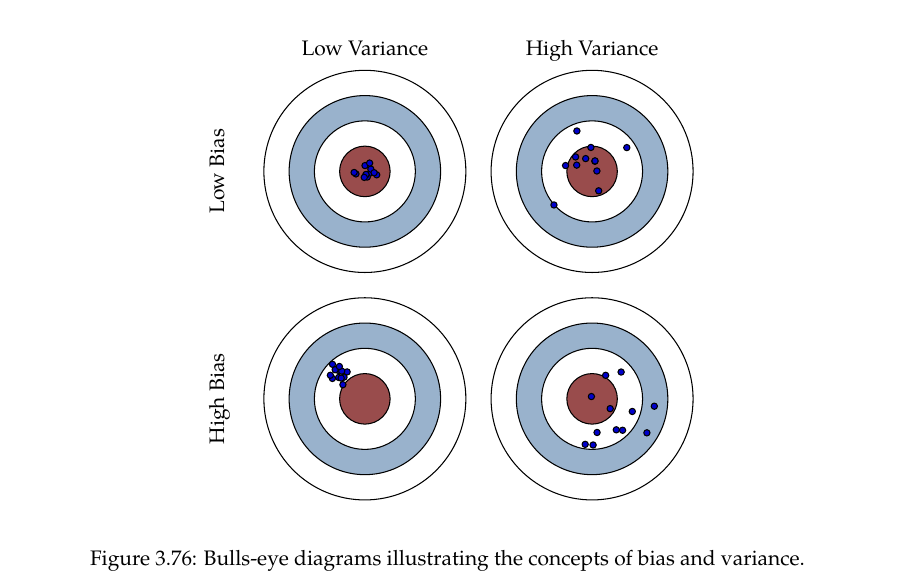

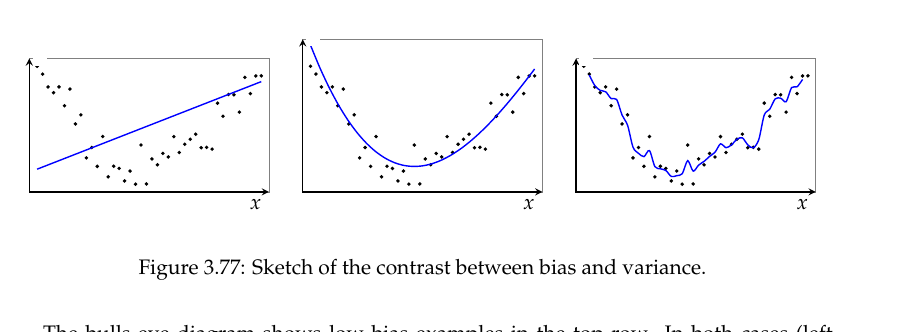

Trade-off between bias and variance.

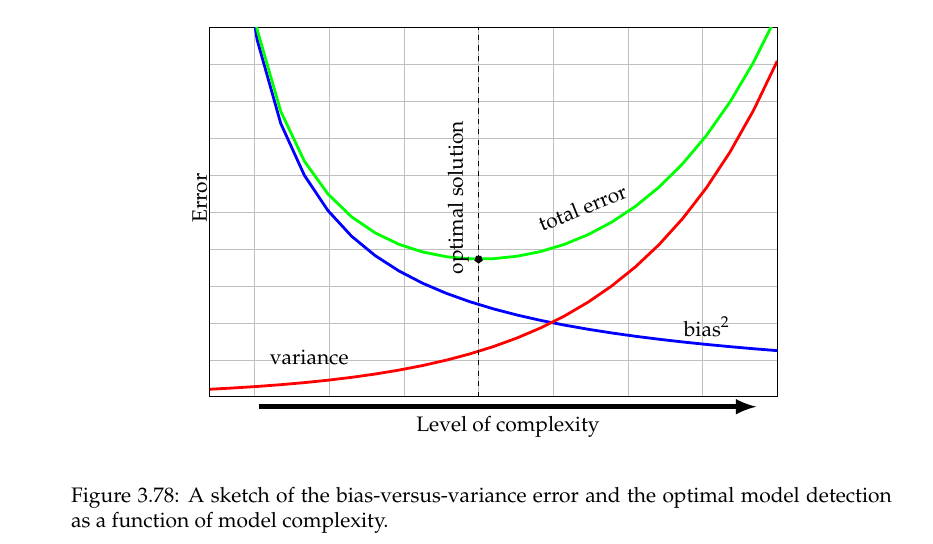



# Learning Curves. Curvas de aprendizaje.

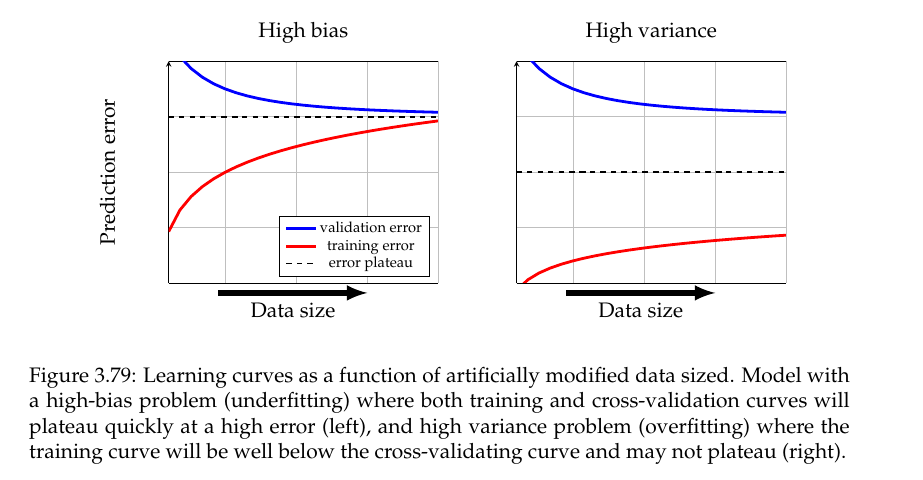

Hay dos situaciones que nos permiten estimar el problema de varianza o de sesgo. Son herramientas de diagnostico.:

* Sesgo alto: A medida que los datos crecen (en cantidad $m$),
el sesgo de entrenamiento crece y el de prueba decrece. Llegan
a estar cerca en una linea asintotica (punteada en la grafica).

* Varianza alta: A medida que los datos crecen (en cantidad $m$),
el sesgo de entrenamiento crece y el de prueba decrece. No llegan
a estar cerca el uno del otro. Hay un espacio en la parte asintotica (gap). Como lo muestra la figura.


## Formas de prevenir bias/variance

* Que pasa si se tiene varianza alta.
    * Incrementar el numero de muestras $m$.
    * Reducir el numero de "features" (atributos). Por ejemplo reducir el orden el numero de variables independientes en un polinomio.
    * Incrementar el parametro de regularizacion $\lambda$.

 $$\lambda$$

 * Que pasa si se tiene sesgo alto.
    * podemos incrementar los datos
    * agregar nuevos "features". Por ejemplo si quiere comprar una casa (o vender), el numero de cuartos no se suficiente, piense en agregar: tamano de la casa, estrato de la zona, arquitectura, acabados, crimen en el area, cercania a torres de limpieza que generan malos olores.

    * Decrecer el tamano del parametro de regularizacion $\lambda$.

    

# Proxima clase: Support Vector Machines (SVM).